# PRACTICA 23

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
drugs = pd.read_csv('C:/Users/Isaac/Desktop/IHD/EBAC DT/M23 DS/drugs.csv')
drugs

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
# defininimos caracteristicas para los pronosticos

feature_cols = ['Age','Sex','BP','Cholesterol','Na_to_K']

# definimos valores para 'x' y 'y'

X = drugs[feature_cols].values
y = drugs.Drug

Convertir las variables predictoras cualitativas de esta base a una escala numérica mediante la instrucción “preprocessing.LabelEncoder()


In [5]:
from sklearn import preprocessing

cod_sex = preprocessing.LabelEncoder()
cod_sex.fit(['F','M'])
X[:,1] = cod_sex.transform(X[:,1])

cod_bp = preprocessing.LabelEncoder()
cod_bp.fit(['HIGH','LOW','NORMAL'])
X[:,2] = cod_bp.transform(X[:,2])

cod_Chol = preprocessing.LabelEncoder()
cod_Chol.fit(['HIGH','NORMAL'])
X[:,3] = cod_Chol.transform(X[:,3])

In [16]:
X

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368],
       [47, 0, 1, 0, 11.767],
       [34, 0, 0, 1, 19.199],
       [43, 1, 1, 0, 15.376],
       [74, 0, 1, 0, 20.942],
       [50, 0, 2, 0, 12.703],
       [16, 0, 0, 1, 15.516],
       [69, 1, 1, 1, 11.455],
       [43, 1, 0, 0, 13.972],
       [23, 1, 1, 0, 7.298],
       [32, 0, 0, 1, 25.974],
       [57, 1, 1, 1, 19.128],
       [63, 1, 2, 0, 25.917],
       [47, 1, 1, 1, 30.568],
       [48, 0, 1, 0, 15.036],
       [33, 0, 1, 0, 33.486],
       [28, 0, 0, 1, 18.809],
       [31, 1, 0, 0, 30.366],
       [49, 0, 2, 1, 9.381],
       [39, 0, 1, 1, 22.697],
       [45, 1, 1, 0, 17.951],
       [18, 0, 2, 1, 8.75],
       [74, 1, 0, 0, 9.567],
       [49, 1, 1, 1, 11.014],
       [65, 0, 0,

In [7]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [6]:
# creamos grupos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [7]:
# objeto de calsificacion del Arbol de Decision

clf = DecisionTreeClassifier()

# entrenamos el modelo

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
# realizamos predicciones

clf_pred = clf.predict(X_test)

In [10]:
# Matriz de Conficion

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf_pred)
cm

array([[ 4,  0,  0,  0,  0],
       [ 2,  4,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 27]], dtype=int64)

ESTADISTICAS DE DESEMPEÑO

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         4
       drugB       1.00      0.67      0.80         6
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        19
       drugY       1.00      1.00      1.00        27

    accuracy                           0.97        60
   macro avg       0.93      0.93      0.92        60
weighted avg       0.98      0.97      0.97        60



In [12]:
from sklearn import tree
import graphviz
import pydotplus
from PIL import Image

ARBOL DE DECISION (REGLAS)

In [13]:
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = feature_cols, class_names = ['drugY','drugC','drugX','drugA','drugB'])

# creamos la grafica de Arbol

graph = pydotplus.graph_from_dot_data(dot_data)

In [28]:
# creacion del Arbol en formato png

graph.write_png('drug.png')
image = Image.open('drug.png')
image.show()

# utilizando entropy

In [16]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         4
       drugB       1.00      0.67      0.80         6
       drugC       0.00      0.00      0.00         4
       drugX       0.83      1.00      0.90        19
       drugY       1.00      1.00      1.00        27

    accuracy                           0.90        60
   macro avg       0.70      0.73      0.70        60
weighted avg       0.86      0.90      0.87        60



In [19]:
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = feature_cols, class_names = ['drugY','drugC','drugX','drugA','drugB'])

# creamos la grafica de Arbol

graph = pydotplus.graph_from_dot_data(dot_data)

In [29]:
# creacion del Arbol en formato png

graph.write_png('Drug.png')
image = Image.open('Drug.png')
image.show()

## ¿Qué medicamento recomendaría utilizar para un paciente con los siguientes datos? 
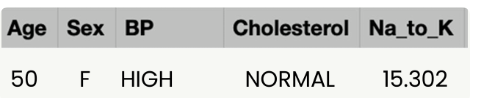

In [21]:
# Predicción con nuevos valores específicos
new_data = {'Age': 50, 'Sex': 'F', 'BP': 'HIGH', 'Cholesterol': 'NORMAL', 'Na_to_K': 15.302}
new_data['Sex'] = cod_sex.transform([new_data['Sex']])[0]
new_data['BP'] = cod_bp.transform([new_data['BP']])[0]
new_data['Cholesterol'] = cod_Chol.transform([new_data['Cholesterol']])[0]

In [26]:
new_data_array = np.array([[new_data['Age'], new_data['Sex'], new_data['BP'], new_data['Cholesterol'], new_data['Na_to_K']]])
new_data_array

array([[50.   ,  0.   ,  0.   ,  1.   , 15.302]])

In [25]:
# Realizamos la prediccion
pred_drug = clf.predict(new_data_array)
print("La predicción para el nuevo dato es:", predicted_drug[0])

La predicción para el nuevo dato es: drugY


# * El medicamento que se recomendaria al paciente con los datos dados, sería Drug Y